In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-v0_8-paper')

# **1.Shelep algorithm!**


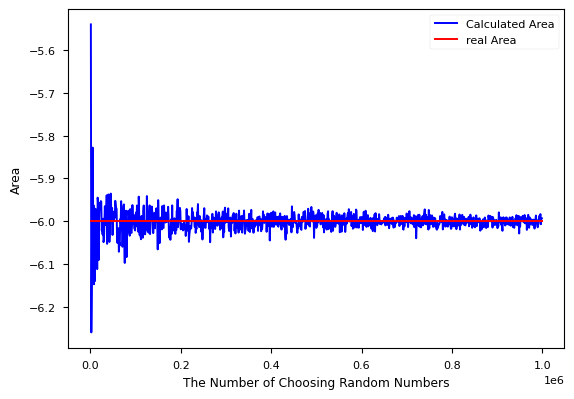

In [ ]:
#We can set ym = -10,so lets make this algorithm
n = np.arange(1000, 1000000, 1000)
RealValue = -6
Area= []

for k in n:
  x = np.random.uniform(low = 0.0, high=2.0, size=k)
  y = np.random.uniform(low=-10.0, high=0.0, size=k)
  yfunction = x**3 - 5*x
  Ns = np.sum(y >= yfunction)
  Area.append(-10 * 2 * Ns/k)

realArea = np.full(shape = len(n), fill_value= -6)
plt.plot(n, Area, c = 'b', label='Calculated Area')
plt.plot(n , realArea, c='r', label='real Area')
plt.xlabel(xlabel = 'The Number of Choosing Random Numbers')
plt.ylabel(ylabel = 'Area')
plt.legend()
plt.show()



# **2.Monte-Carlo Integral**

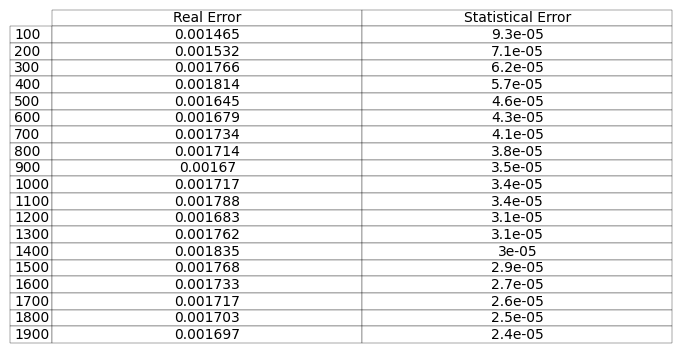

Time taken: 54.55 seconds


In [ ]:
#first lets solve this problem using simple sampling
#I = (b-a)<f> = 2*<f>
#Real Value of I approximately is 0.882
import time
start = time.time()

statisticalError = []
realError = []

for i in range(100, 2000, 100):

  #i create i samples each having 100_000 instances
  x = np.random.uniform(low=0, high=2, size=(i,100000))
  f = np.exp(-x**2)
  fbar = np.mean(f, axis=1)
  I = 2 * fbar
  realErr = I - 0.882
  realError.append(np.mean(np.abs(realErr)))
  statisticalError.append(np.std(fbar) / np.sqrt(i))

realError = np.array(realError).reshape(-1, 1)
statisticalError = np.array(statisticalError).reshape(-1, 1)
data = np.hstack((realError, statisticalError))
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(
    cellText=data.round(6),
    loc='center',
    cellLoc='center',
    colLabels=['Real Error', 'Statistical Error'],
    rowLabels=[str(i) for i in range(100, 2000, 100)]
)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.show()
print(f"Time taken: {time.time() - start:.2f} seconds")

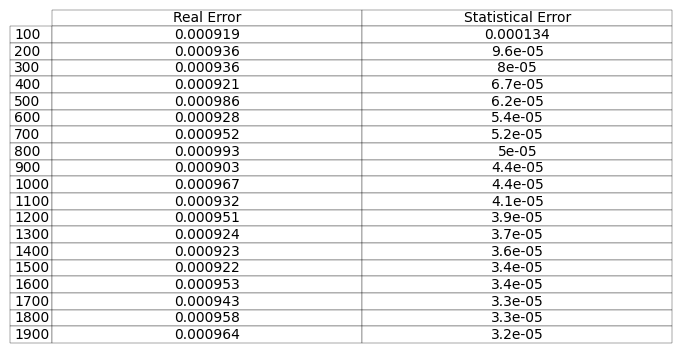

Time taken: 44.97 seconds


In [ ]:
#now lets use smart sampling with g(x) = exp(-x),i use the previous Hw algorithm to create distribution with exp(-y) distribution

statisticalError = []
realError = []
start = time.time()

for i in range(100, 2000, 100):

  #i create i samples each having 100_000 instances
  x = np.random.uniform(0, 1 - np.exp(-2), size=(i, 50000))
  x = -np.log(1-x)#the transformation
  f = np.exp(-x**2 + x)
  fbar = np.mean(f, axis=1)
  I = (1 - np.exp(-2)) * fbar
  realErr = I - 0.882
  realError.append(np.mean(np.abs(realErr)))
  statisticalError.append(np.std(fbar) / np.sqrt(i))

realError = np.array(realError).reshape(-1, 1)
statisticalError = np.array(statisticalError).reshape(-1, 1)
data = np.hstack((realError, statisticalError))
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(
    cellText=data.round(6),
    loc='center',
    cellLoc='center',
    colLabels=['Real Error', 'Statistical Error'],
    rowLabels=[str(i) for i in range(100, 2000, 100)]
)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.show()
print(f"Time taken: {time.time() - start:.2f} seconds")

# **3.Multiple Integral**

In [7]:
#for generating points inside the sphere i will use polar cordinate then switch to Elucidian after that
r = np.random.uniform(0, 1, 10000000)**(1/3)
theta = np.arccos(np.random.uniform(-1, 1, 10000000))
phi = np.random.uniform(0, 2*np.pi, 10000000)
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)
rho = 1/4 * (3 + z)#this is density of sphere(check the report)
#here are the points inside the sphere,now we Can compute CM
XCM = 4 / 3 * np.mean(x*rho)
YCM = 4 / 3 * np.mean(y*rho)
ZCM = 4 / 3 * np.mean(z*rho)
print(f"XCM = {XCM}, YCM = {YCM}, ZCM = {ZCM}")

XCM = -1.7210745704586682e-05, YCM = -1.5859623568572788e-06, ZCM = 0.06677074316806603
